Myriad results comparing script A reduced via Sequence of rotations (denoted as standard/std approach)
and LCU

(In both cases classically applied)

In [1]:
import numpy as np
import os
import ast

%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [2]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_sub_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_sub_dir, 'JW')


In [3]:
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size ={}
for mol_key in tapered_hamiltonians.keys():
    tapered_H_size[mol_key] = {'N_terms':len(tapered_hamiltonians[mol_key][2]), 'N_qubits':tapered_hamiltonians[mol_key][1]}

# tapered_H_size

In [47]:
for key in tapered_H_size.keys():
    print(f"{key: <25}     No. terms:  {tapered_H_size[key]['N_terms']:<10.0f} No. qubits:  {tapered_H_size[key]['N_qubits']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms:  6237       No. qubits:  18   
C1-O1_STO-3G_singlet          No. terms:  4409       No. qubits:  16   
H1-Cl1_STO-3G_singlet         No. terms:  4409       No. qubits:  16   
H1-Na1_STO-3G_singlet         No. terms:  4409       No. qubits:  16   
H2-Mg1_STO-3G_singlet         No. terms:  3540       No. qubits:  17   
H1-F1_3-21G_singlet           No. terms:  6852       No. qubits:  18   
H1-Li1_3-21G_singlet          No. terms:  6852       No. qubits:  18   
Be1_STO-3G_singlet            No. terms:  102        No. qubits:  5    
H1-F1_STO-3G_singlet          No. terms:  558        No. qubits:  8    
H1-Li1_STO-3G_singlet         No. terms:  558        No. qubits:  8    
Ar1_STO-3G_singlet            No. terms:  1465       No. qubits:  13   
F2_STO-3G_singlet             No. terms:  2229       No. qubits:  15   
H1-O1_STO-3G_singlet          No. terms:  558        No. qubits:  8    
H2-Be1_STO-3G_singlet         No. terms:  596        No. qubits:

In [48]:
for filename in os.listdir(fullH_sub_JW_dir):
    if filename.endswith('.oplist'):
        print(filename[:-7])

Ne1_STO-3G_singlet_NeNe
O2_STO-3G_triplet_O2O2
Na1_STO-3G_doublet_NaNa
H2-C2_STO-3G_singlet_EthyneEthyne
H1-N1-O3_STO-3G_singlet_HNO3HNO3
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G
Cl1_STO-3G_doublet_ClCl
H2-C1-O1_STO-3G_singlet_MethanalMethanal
P1_STO-3G_quartet_PP
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G
N1-O2_STO-3G_doublet_ONOONO
Cl1_STO-3G_singlet_-1-_Cl-Cl-
H1-F1_STO-3G_singlet_HFHF
H5-C1-N1_STO-3G_singlet_MethylamineMethylamine
H2_6-311G*_singlet_H2_6-311G*H2_6-311G*
O1_STO-3G_triplet_OO
Mg1_STO-3G_singlet_MgMg
H3_3-21G_singlet_1+_H3+_3-21GH3+_3-21G
He1_STO-3G_singlet_HeHe
N1-O3_STO-3G_singlet_-1-_NO3-NO3-
H2-S1_STO-3G_singlet_H2SH2S
O2_STO-3G_singlet_O2_singletO2_singlet
H6-C3_STO-3G_singlet_PropenePropene
H2_6-31G**_singlet_H2_6-31G**H2_6-31G**
H2-C1_STO-3G_triplet_CH2CH2
C1-O3_STO-3G_singlet_CO3CO3
H4-C2_STO-3G_singlet_EtheneEthene
H8-C3_STO-3G_singlet_PropanePropane
H4-C1-O1_STO-3G_singlet_MethanolMethanol
H1-He1_6-31G*_singlet_1+_HeH+_6-31G*HeH+_6-31G*
Si1_STO-3G_triplet_SiSi
I1_ST

In [5]:
def Convert_full_H_to_dict(file_path_with_name):
    
    # function to convert .oplist file to dictionary!
    
    CONVERSION_DICT = {
                        0 : 'I',
                        1: 'X',
                        2: 'Y',
                        3: 'Z'
                        }
    
    with open(file_path_with_name,'rb') as infile:
        data = pickle.load(infile,encoding='latin1')
    
    Hamiltonian = {}
    for coeff, P_str_list in data:
        P_word = ''.join([CONVERSION_DICT[P_key] for P_key in P_str_list])
        Hamiltonian[P_word]= np.real(coeff)
     
    return Hamiltonian

In [6]:
# import re
# test = 'Be1_STO-3G_singlet'
# test2 = 'Be1_STO-3G_singlet_BeBe'
# print(bool(re.match(f'^.*{test}.*$', test2))) # test to see how re works

In [7]:
## Hamiltonians for experiment:
# list(tapered_H_size.keys())

In [8]:
## Pre tapered Hamiltonians
# [filename[:-7] for filename in os.listdir(fullH_sub_JW_dir) if filename.endswith('.oplist')]

In [70]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re

full_hamiltonians_dict={}
for filename in os.listdir(fullH_sub_JW_dir):
    if filename.endswith('.oplist'):
        filename_with_ext = filename[:-7]
        
        if filename in ['H2-O2-Mg1_STO-3G_singlet_Mg_HydroxideMg_Hydroxide.oplist',
                        'H2-C1-O1_STO-3G_singlet_MethanalMethanal',
                        'H4-C1-O1_STO-3G_singlet_MethanolMethanol',
                        'H3-C2-O2_STO-3G_singlet_-1-_Ethanoate_ionEthanoate_ion',
                        'H2-O2_STO-3G_singlet_Hydrogen_PeroxideHydrogen_Peroxide',
                        'H4-C2-O2_STO-3G_singlet_Ethanoic_AcidEthanoic_Acid',
                        'C1-O2_STO-3G_singlet_CO2CO2']:
            continue
        for mol_name in tapered_hamiltonians.keys():
            if bool(re.match(f'^.*{mol_name}.*$', filename_with_ext)): # wildcard at front and wildcard at end
#                 print(filename_with_ext)
#                 print(mol_name)
#                 print('')
                file = os.path.join(fullH_sub_JW_dir, filename)
                H = Convert_full_H_to_dict(file)
                full_hamiltonians_dict[mol_name] = H

In [65]:
## check keys match!
sorted(list(full_hamiltonians_dict.keys())) == sorted(list(tapered_hamiltonians.keys()))

True

In [66]:
full_H_size ={}
for mol_key in full_hamiltonians_dict.keys():
    full_H_size[mol_key] = {'N_terms':len(full_hamiltonians_dict[mol_key]),
                               'N_qubits':len(list(full_hamiltonians_dict[mol_key].keys())[0])}
full_H_size

{'Ne1_STO-3G_singlet': {'N_terms': 156, 'N_qubits': 10},
 'H1-F1_3-21G_singlet': {'N_terms': 13958, 'N_qubits': 22},
 'C1-O1_STO-3G_singlet': {'N_terms': 5475, 'N_qubits': 20},
 'H1-F1_STO-3G_singlet': {'N_terms': 631, 'N_qubits': 12},
 'Mg1_STO-3G_singlet': {'N_terms': 4582, 'N_qubits': 22},
 'H3_3-21G_singlet_1+': {'N_terms': 1501, 'N_qubits': 12},
 'H2-S1_STO-3G_singlet': {'N_terms': 6246, 'N_qubits': 22},
 'O2_STO-3G_singlet': {'N_terms': 13620, 'N_qubits': 30},
 'H1-Li1_STO-3G_singlet': {'N_terms': 631, 'N_qubits': 12},
 'Be1_STO-3G_singlet': {'N_terms': 156, 'N_qubits': 10},
 'H2-Be1_STO-3G_singlet': {'N_terms': 666, 'N_qubits': 14},
 'H1-Li1_3-21G_singlet': {'N_terms': 8758, 'N_qubits': 22},
 'H1-Na1_STO-3G_singlet': {'N_terms': 5851, 'N_qubits': 20},
 'H4-N1_STO-3G_singlet_1+': {'N_terms': 6892, 'N_qubits': 18},
 'H2-Mg1_STO-3G_singlet': {'N_terms': 4582, 'N_qubits': 22},
 'H1-He1_STO-3G_singlet': {'N_terms': 27, 'N_qubits': 4},
 'H3-N1_STO-3G_singlet': {'N_terms': 4293, 'N_qub

In [67]:
full_H_size['H2-S1_STO-3G_singlet']['N_terms']

6246

In [71]:
# full_H_size = {mol_key: len(full_hamiltonians_dict[mol_key]) for mol_key in full_hamiltonians_dict}

for key in tapered_H_size.keys():
    print(f"{key: <25}     No. terms orig:  {full_H_size[key]['N_terms']:<5.0f}  No. terms tapering:  {tapered_H_size[key]['N_terms']:<5.0f} tap_vs_orig_qubits: {tapered_H_size[key]['N_qubits']:<2.0f} vs {full_H_size[key]['N_qubits']:<2.0f}")

H2-S1_STO-3G_singlet          No. terms orig:  6246   No. terms tapering:  6237  tap_vs_orig_qubits: 18 vs 22
C1-O1_STO-3G_singlet          No. terms orig:  5475   No. terms tapering:  4409  tap_vs_orig_qubits: 16 vs 20
H1-Cl1_STO-3G_singlet         No. terms orig:  8159   No. terms tapering:  4409  tap_vs_orig_qubits: 16 vs 20
H1-Na1_STO-3G_singlet         No. terms orig:  5851   No. terms tapering:  4409  tap_vs_orig_qubits: 16 vs 20
H2-Mg1_STO-3G_singlet         No. terms orig:  4582   No. terms tapering:  3540  tap_vs_orig_qubits: 17 vs 22
H1-F1_3-21G_singlet           No. terms orig:  13958  No. terms tapering:  6852  tap_vs_orig_qubits: 18 vs 22
H1-Li1_3-21G_singlet          No. terms orig:  8758   No. terms tapering:  6852  tap_vs_orig_qubits: 18 vs 22
Be1_STO-3G_singlet            No. terms orig:  156    No. terms tapering:  102   tap_vs_orig_qubits: 5  vs 10
H1-F1_STO-3G_singlet          No. terms orig:  631    No. terms tapering:  558   tap_vs_orig_qubits: 8  vs 12
H1-Li1_STO

In [14]:
## import LCU results
output_dir = os.path.join(parent_dir, 'Pickle_out')

myriad_LCU_results = {}
for filename in os.listdir(output_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(output_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_LCU_results[mol_name] = data[mol_name]

myriad_LCU_results

{'H1-Na1_STO-3G_singlet': [-163.89099223972988,
  [-162.4713169656107,
   -163.83546812508018,
   -163.83731392837,
   -163.8403885398852,
   -163.8443096640603,
   -163.8443843381146,
   -163.85255153730975,
   -163.85271567987957,
   -163.86212017506264,
   -163.86292008440563,
   -163.86862965265192,
   -163.8734703532546,
   -163.88160786032574,
   -163.88601910853998,
   -163.89090469014158,
   -163.8909400720967,
   -163.8909922397291],
  [1.4196752741191858,
   0.05552411464969964,
   0.05367831135987444,
   0.050603699844685934,
   0.04668257566959255,
   0.04660790161528894,
   0.03844070242013231,
   0.03827655985031697,
   0.028872064667240238,
   0.02807215532425289,
   0.022362587077964236,
   0.017521886475293513,
   0.009384379404139054,
   0.0049731311898995045,
   8.754958830081705e-05,
   5.216763318571793e-05,
   7.958078640513122e-13],
  [15, 10, 6, 7, 1, 8, 0, 9, 4, 5, 3, 2, 11, 12, 13, 14]],
 'H1-Li1-O1_STO-3G_singlet': [-95.74731724722919,
  [-94.93876323715486,


In [15]:
## import standard results
output_dir = os.path.join(parent_dir, 'Pickle_out')

myriad_std_results = {}
for filename in os.listdir(output_dir):
    if (filename.endswith('.pickle') and filename.startswith('standard_CS_VQE_exp')):
        file_path = os.path.join(output_dir, filename) 
        mol_name = filename[45:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_std_results[mol_name] = data[mol_name]

myriad_std_results

{'N2_STO-3G_singlet': [-130.537456289159,
  [-130.3694821814372,
   -130.36949061796668,
   -130.40986372839043,
   -130.41700621100185,
   -130.44376160952865,
   -130.4454992876728,
   -130.4914107688217,
   -130.5058907400856,
   -130.51580084860677,
   -130.52829325827116,
   -130.52882442061644,
   -130.53717500014739,
   -130.53724024843387,
   -130.5372774771707,
   -130.53735577648274,
   -130.5374562891598],
  [0.16797410772178978,
   0.1679656711923201,
   0.12759256076856218,
   0.12045007815714825,
   0.09369467963034595,
   0.09195700148620745,
   0.04604552033728737,
   0.03156554907340592,
   0.021655440552223126,
   0.009163030887833656,
   0.008631868542551047,
   0.0002812890116103972,
   0.00021604072512104722,
   0.00017881198829172718,
   0.0001005126762549935,
   -7.958078640513122e-13],
  [1, 6, 2, 5, 3, 4, 0, 10, 9, 8, 7, 13, 12, 11, 14]],
 'H2-Mg1_STO-3G_singlet': [-206.68032092894842,
  [-206.63054384637562,
   -206.63054384637556,
   -206.6338145111699,
   -2

In [16]:
myriad_std_results['H2-S1_STO-3G_singlet'][1]

[-407.3321908160965,
 -407.3321908160967,
 -407.33612679191714,
 -407.34417536567605,
 -407.35020149927874,
 -407.36358339675587,
 -407.3671182912079,
 -407.37311711560915,
 -407.3739950541697,
 -407.37402684450177,
 -407.3741483975605,
 -407.3742573259773,
 -407.3744264709824,
 -407.3744730996499,
 -407.3745286756156,
 -407.3745303487756,
 -407.3745332647874,
 -407.37453372926313,
 -407.37453464052163]

### combined results 

In [81]:
import sys
sys.path.insert(1, parent_dir)
import cs_vqe as c
import cs_vqe_with_LCU as c_LCU

from copy import deepcopy as copy
import tqdm
from tqdm.notebook import tqdm

In [84]:
STANDARD_RESULTS={}
for key in tqdm(myriad_std_results.keys(), ascii=True, desc='getting standard CS-VQE results'):

    ham_noncon = tapered_hamiltonians[key][3]
    ep_state = [list(tapered_hamiltonians[key][5][1]), list(tapered_hamiltonians[key][5][2])] # ground state of noncontextual Ham
    ham = tapered_hamiltonians[key][2]

    model = c.quasi_model(ham_noncon)
    fn_form = c.energy_function_form(ham_noncon, model)

    N_qubits_tapered = tapered_hamiltonians[key][1]
    N_qubits_original_H = full_H_size[key]['N_qubits']
    
    order= copy(myriad_std_results[key][-1]) # <-- order specified from greedy run by Will
    qubit_removal_order=copy(order)
    
    reduced_Con_hamiltonians = c.get_reduced_hamiltonians(ham ,model, fn_form, ep_state, order)
    
    gs_energy_hamilt = tapered_hamiltonians[key][4]
    gs_energy_cs_vqe = myriad_std_results[key][0]
    if gs_energy_hamilt!=gs_energy_cs_vqe:
        raise ValueError('ground state energy mismatch')
    
    STANDARD_RESULTS[key] = {
                                'N_qubits_tapered': N_qubits_tapered,
                                'N_qubits_original_H': N_qubits_original_H,
        
                                'CS_VQE_energy_results': myriad_std_results[key][1],
                                'CS_VQE_error_results': myriad_std_results[key][2],
                                'FCI':tapered_hamiltonians[key][4],                         
                                'gstate_noncon':tapered_hamiltonians[key][5], 
                                'Contextual_Hamiltonian_list': reduced_Con_hamiltonians, #ham_out,   
#                                 'non_Contextual_H': conv_scr.Get_Openfermion_Hamiltonian(ham_noncon),# ham_noncon_out, 
                                'qubit_removal_order':qubit_removal_order
                             }
    
    
    
LCU_RESULTS={}
for key in tqdm(myriad_LCU_results.keys(), ascii=True, desc='getting LCU CS-VQE results'):

    ham_noncon = tapered_hamiltonians[key][3]
    ep_state = [list(tapered_hamiltonians[key][5][1]), list(tapered_hamiltonians[key][5][2])] # ground state of noncontextual Ham
    ham = tapered_hamiltonians[key][2]

    model = c.quasi_model(ham_noncon)
    fn_form = c.energy_function_form(ham_noncon, model)

    N_qubits_tapered = tapered_hamiltonians[key][1]
    N_qubits_original_H = full_H_size[key]['N_qubits']
    
    order= copy(myriad_LCU_results[key][-1]) # <-- order specified from greedy run by Will
    qubit_removal_order=copy(order)
    
    
    N_index=0
    reduced_Con_hamiltonians = c_LCU.get_reduced_hamiltonians_LCU(ham,model, fn_form, ep_state, order, 
                                                                  N_qubits_tapered, N_index)
    
    gs_energy_hamilt = tapered_hamiltonians[key][4]
    gs_energy_cs_vqe = myriad_LCU_results[key][0]
    if gs_energy_hamilt!=gs_energy_cs_vqe:
        raise ValueError('ground state energy mismatch')
    
    LCU_RESULTS[key] = {
                                'N_qubits_tapered': N_qubits_tapered,
                                'N_qubits_original_H': N_qubits_original_H,
        
                                'CS_VQE_energy_results': myriad_LCU_results[key][1],
                                'CS_VQE_error_results': myriad_LCU_results[key][2],
                                'FCI':tapered_hamiltonians[key][4],                         
                                'gstate_noncon':tapered_hamiltonians[key][5], 
                                'Contextual_Hamiltonian_list': reduced_Con_hamiltonians, #ham_out,   
#                                 'non_Contextual_H': conv_scr.Get_Openfermion_Hamiltonian(ham_noncon),# ham_noncon_out, 
                                'qubit_removal_order':qubit_removal_order
                             }

In [19]:
for key in LCU_RESULTS:
    print(key)

H1-Na1_STO-3G_singlet
H1-Li1-O1_STO-3G_singlet
H4-N1_STO-3G_singlet_1+
O2_STO-3G_singlet
Ar1_STO-3G_singlet
H1-Cl1_STO-3G_singlet
H1-He1_STO-3G_singlet
H2_6-31G_singlet
H3_3-21G_singlet_1+
H2-Mg1_STO-3G_singlet
N2_STO-3G_singlet
H3_STO-3G_singlet_1+
H2-O1_STO-3G_singlet
Mg1_STO-3G_singlet
H2-Be1_STO-3G_singlet
H3-N1_STO-3G_singlet
H1-Li1_STO-3G_singlet
H1-O1_STO-3G_singlet
H2_3-21G_singlet
H1-F1_STO-3G_singlet
H4-C1_STO-3G_singlet
C1-O1_STO-3G_singlet
F2_STO-3G_singlet
H1-F1_3-21G_singlet
Ne1_STO-3G_singlet
Be1_STO-3G_singlet
H1-He1_3-21G_singlet_1+
H1-Li1_3-21G_singlet
H2-S1_STO-3G_singlet


In [20]:
# print([len(reducedH) for reducedH in LCU_RESULTS['H1-Na1_STO-3G_singlet']['Contextual_Hamiltonian_list']])
# print([len(reducedH) for reducedH in STANDARD_RESULTS['H1-Na1_STO-3G_singlet']['Contextual_Hamiltonian_list']])


In [21]:
# print(len(LCU_RESULTS['H1-Na1_STO-3G_singlet']['qubit_removal_order']))
# print(len(LCU_RESULTS['H1-Na1_STO-3G_singlet']['CS_VQE_error_results']))
# print(len(LCU_RESULTS['H1-Na1_STO-3G_singlet']['Contextual_Hamiltonian_list']))

In [22]:
# print(len(LCU_RESULTS['H1-Li1_STO-3G_singlet']['qubit_removal_order']))
# print(len(LCU_RESULTS['H1-Li1_STO-3G_singlet']['CS_VQE_error_results']))
# print(len(LCU_RESULTS['H1-Li1_STO-3G_singlet']['Contextual_Hamiltonian_list']))

In [23]:
LCU_RESULTS['H1-Li1_STO-3G_singlet']['Contextual_Hamiltonian_list'][0]

{'': -8.914131227844832}

In [24]:
print(len(STANDARD_RESULTS['Ar1_STO-3G_singlet']['qubit_removal_order']))
print(len(STANDARD_RESULTS['Ar1_STO-3G_singlet']['CS_VQE_error_results']))
print(len(STANDARD_RESULTS['Ar1_STO-3G_singlet']['Contextual_Hamiltonian_list']))

13
13
14


In [25]:
# LCU_RESULTS['Ar1_STO-3G_singlet']['Contextual_Hamiltonian_list'][-1]

In [26]:
len('IIIXZZZZIZZZZXII')

16

In [27]:
LCU_RESULTS['Ar1_STO-3G_singlet']['Contextual_Hamiltonian_list'][-1]

{'IIIIIIIIIIIII': -310.97434478351903,
 'IIIIIIIIIIIIZ': 69.34552507116203,
 'YZXZIZIZIIZYX': 0.004685970048450302,
 'IIIIIIIIIIIZI': 69.34552507116203,
 'IIIIIIIIIIIZZ': 2.697950894556778,
 'IIIIIIIIIIXIX': -0.3561260174288757,
 'YZXZIZIZIIYXZ': -0.0016331112671582463,
 'IIIIIIIIIIXZX': -0.6161776345840999,
 'IIIIIIIIIIYIY': -0.3561260174288757,
 'IIIIIIIIIIYZY': -0.6161776345840999,
 'IIIIIIIIIIZII': 12.830581251646096,
 'IIIIIIIIIIZIZ': 0.7372195157332512,
 'IIIIIIIIIIZZI': 0.8166882296035248,
 'IIIIIIIIIXIXI': -0.028769435102888073,
 'IIIIIIIIIXXYY': -0.07946871387027384,
 'IIIIIIIIIXYYX': 0.07946871387027384,
 'IIIIIIIIIXZXI': -0.6161776345840999,
 'IIIIIIIIIXZXZ': -0.3561260174288757,
 'YZXZIZIZIYZIX': 0.0016331112671582463,
 'IIIIIIIIIYIYI': -0.028769435102888073,
 'IIIIIIIIIYXXY': 0.07946871387027384,
 'YZXZIZIZIYXIZ': 0.009596332985197848,
 'IIIIIIIIIYYXX': -0.07946871387027384,
 'YZXZIZIZIYXZI': 0.009596332985197848,
 'IIIIIIIIIYZYI': -0.6161776345840999,
 'IIIIIIIIIYZYZ': -0

In [28]:
len(LCU_RESULTS['H1-Na1_STO-3G_singlet']['qubit_removal_order'])

16

In [29]:
LCU_RESULTS['Ar1_STO-3G_singlet']['qubit_removal_order']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [85]:
def plot_n_qubits_VS_n_terms(result_dict_LCU,result_dict_Std, mol_name, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    ## get total number of terms for each reduction
    H_sizes_LCU = [len(reducedH) for reducedH in result_dict_LCU[mol_name]['Contextual_Hamiltonian_list']]
    H_sizes_std =[len(reducedH) for reducedH in result_dict_Std[mol_name]['Contextual_Hamiltonian_list']]
    
    
    n_qubits = np.array([i for i in range(1+result_dict_LCU[mol_name]['N_qubits_tapered'])])
#     n_qubits = np.array([i for i in range(len(H_sizes_std))])
    
    width = 0.5  # the width of the bars
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, H_sizes_std, width, label='standard')
    rects2 = ax.bar(n_qubits + width/2, H_sizes_LCU, width, label='LCU terms')

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

#     tapered_N_terms = Nterms_tapered_H_dict[mol_name]
#     rects3 = ax.bar(n_qubits[-1] + width*1.5, tapered_N_terms, width, label='tapered H')
    
#     original_N_terms = Nterms_FULL_H_dict[mol_name]
#     rects4 = ax.bar(n_qubits[-1] + width*2.5, original_N_terms, width, label='original H')

    ####  second y axis!
    true_gs_energy = result_dict_LCU[mol_name]['FCI']
    CS_VQE_std_error = result_dict_LCU[mol_name]['CS_VQE_error_results']
    CS_VQE_LCU_errors = result_dict_Std[mol_name]['CS_VQE_error_results']
#     n_qubits = np.array([i for i in range(len(CS_VQE_LCU_errors))])
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_std_error,color="blue",marker="o", label='CS_VQE std error')
    ax2.plot(n_qubits,CS_VQE_LCU_errors,color="red",marker="x", linestyle='--', label='CS_VQE LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()
    ax2.legend(loc='center left')
    fig.tight_layout()

    plt.show()
    print()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

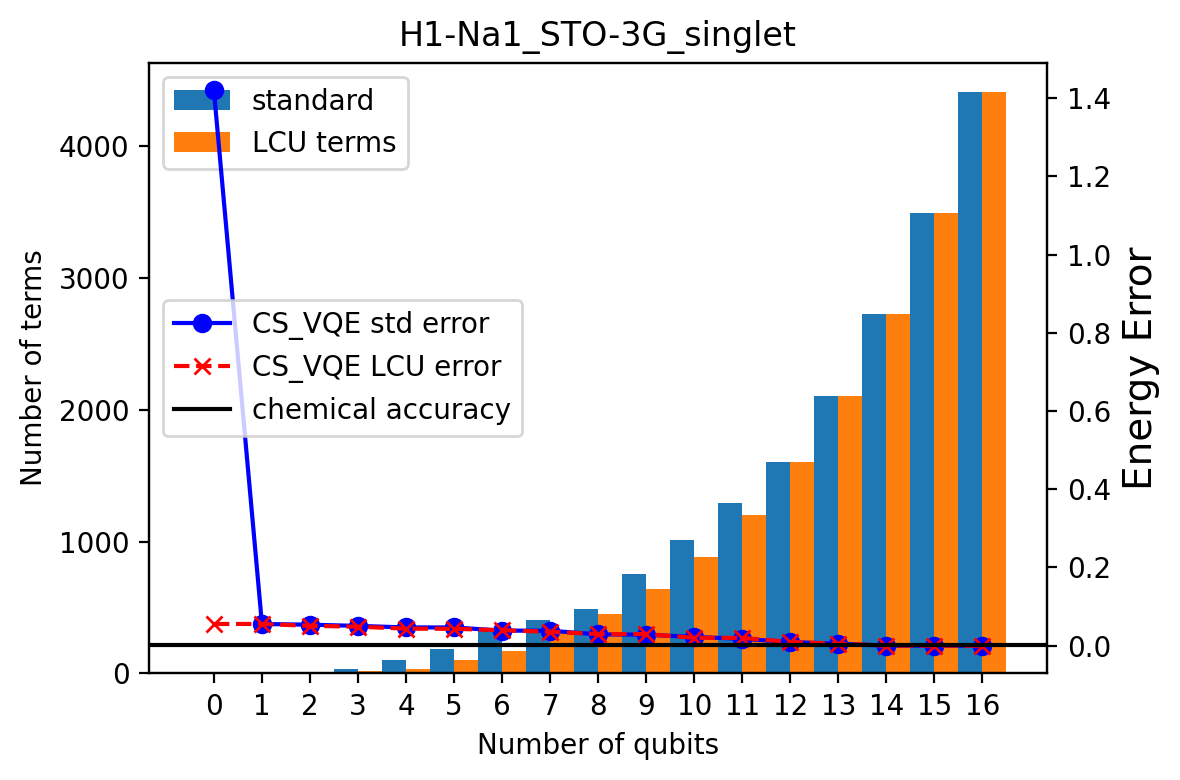

In [86]:
plot_n_qubits_VS_n_terms(LCU_RESULTS,STANDARD_RESULTS, 'H1-Na1_STO-3G_singlet', dpi=200)

In [72]:
paper_results_file = os.path.join(data_dir, 'csvqe_results.txt')
with open(paper_results_file, 'r') as input_file:
    csvqe_results = ast.literal_eval(input_file.read())

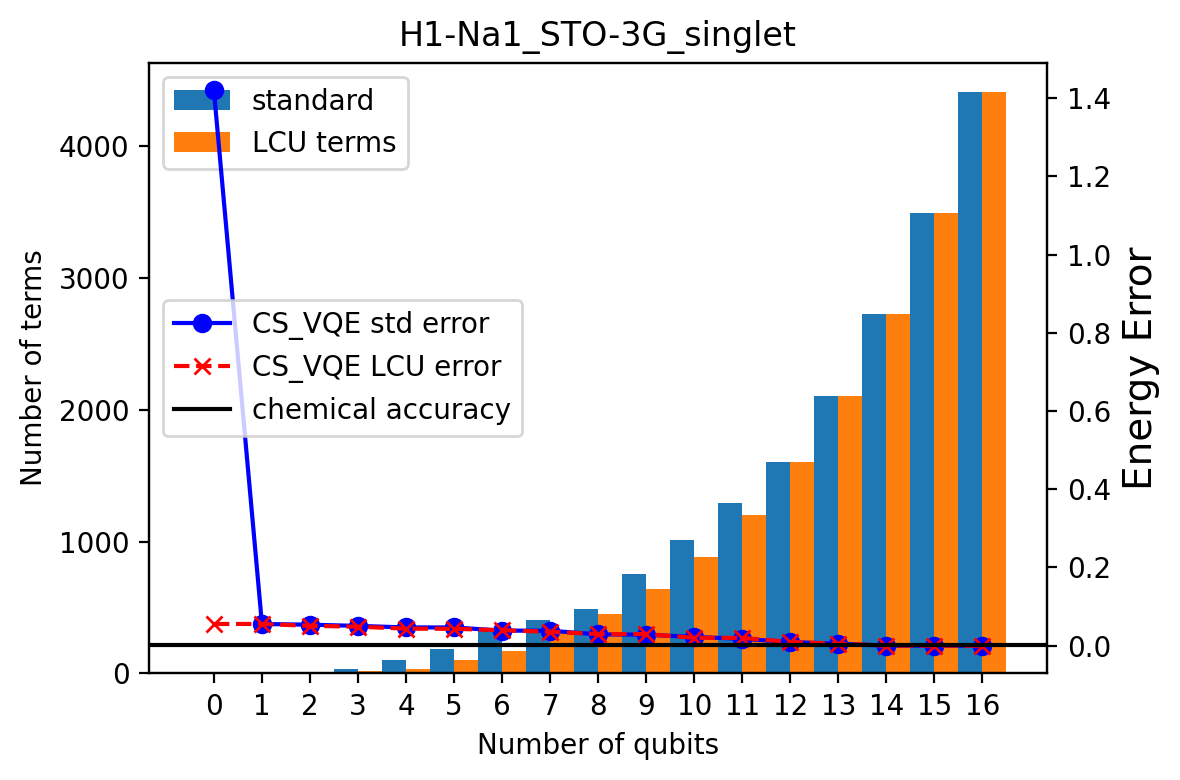

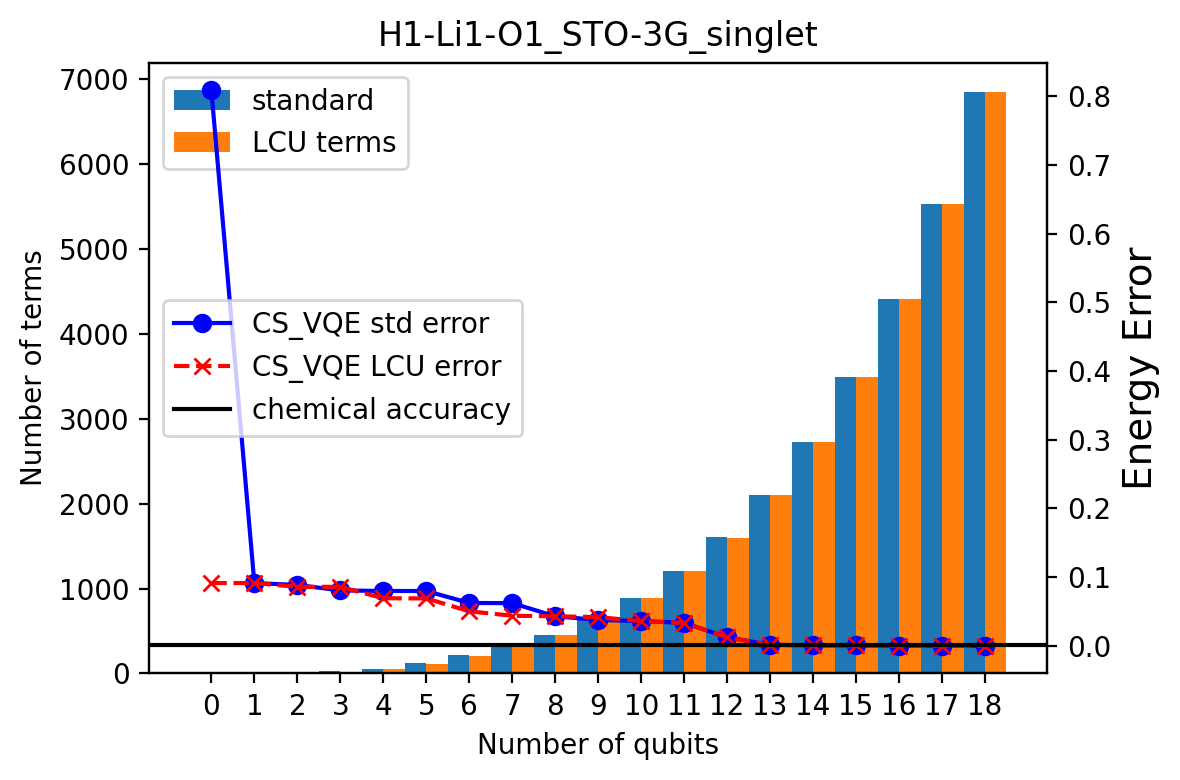

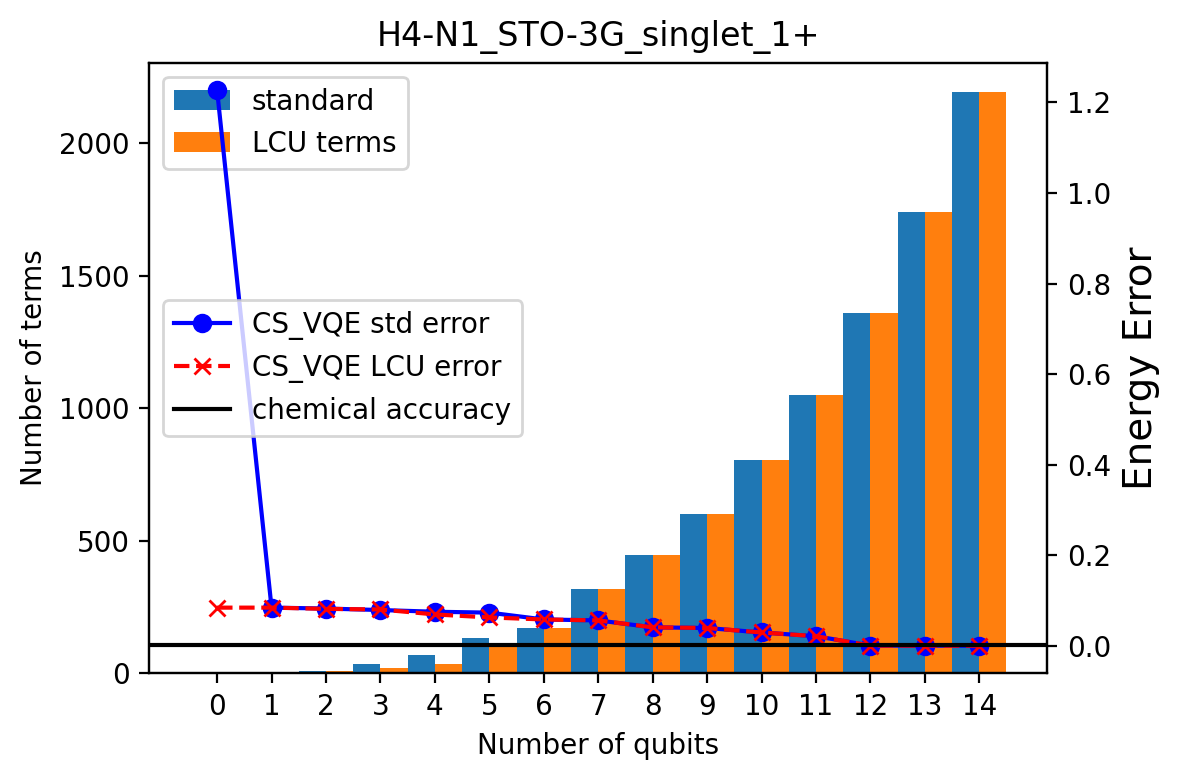

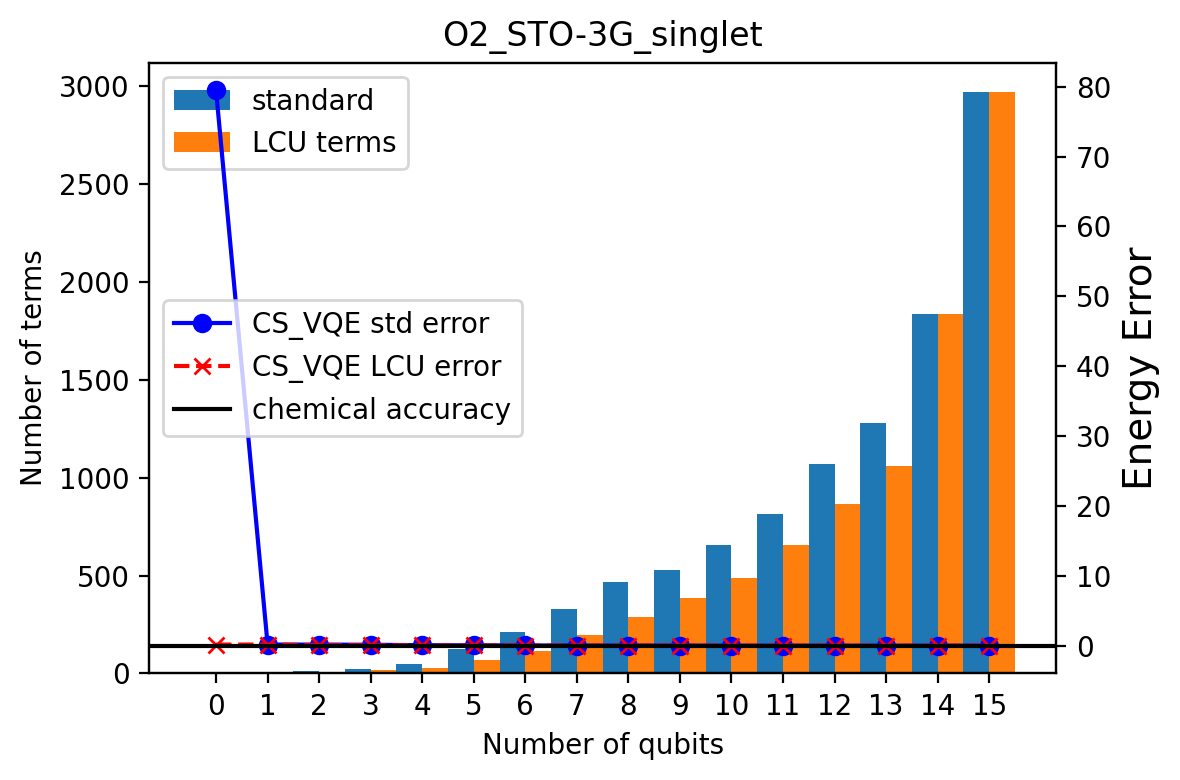

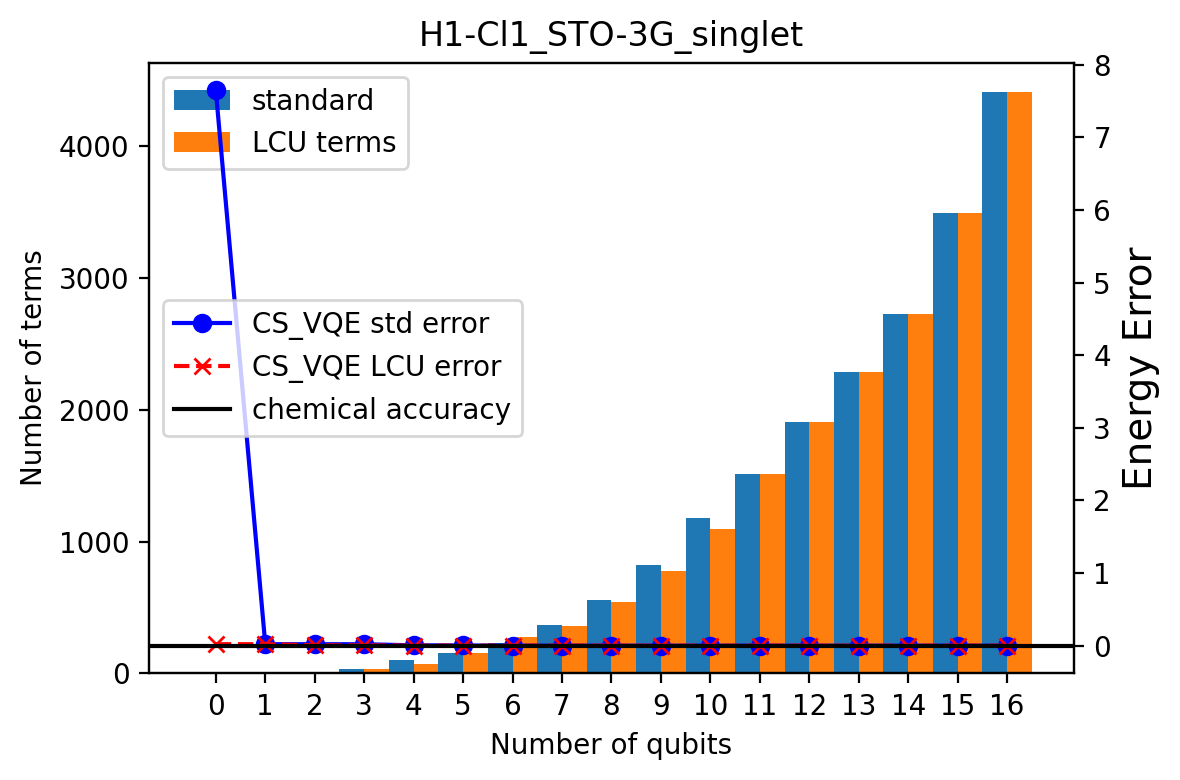

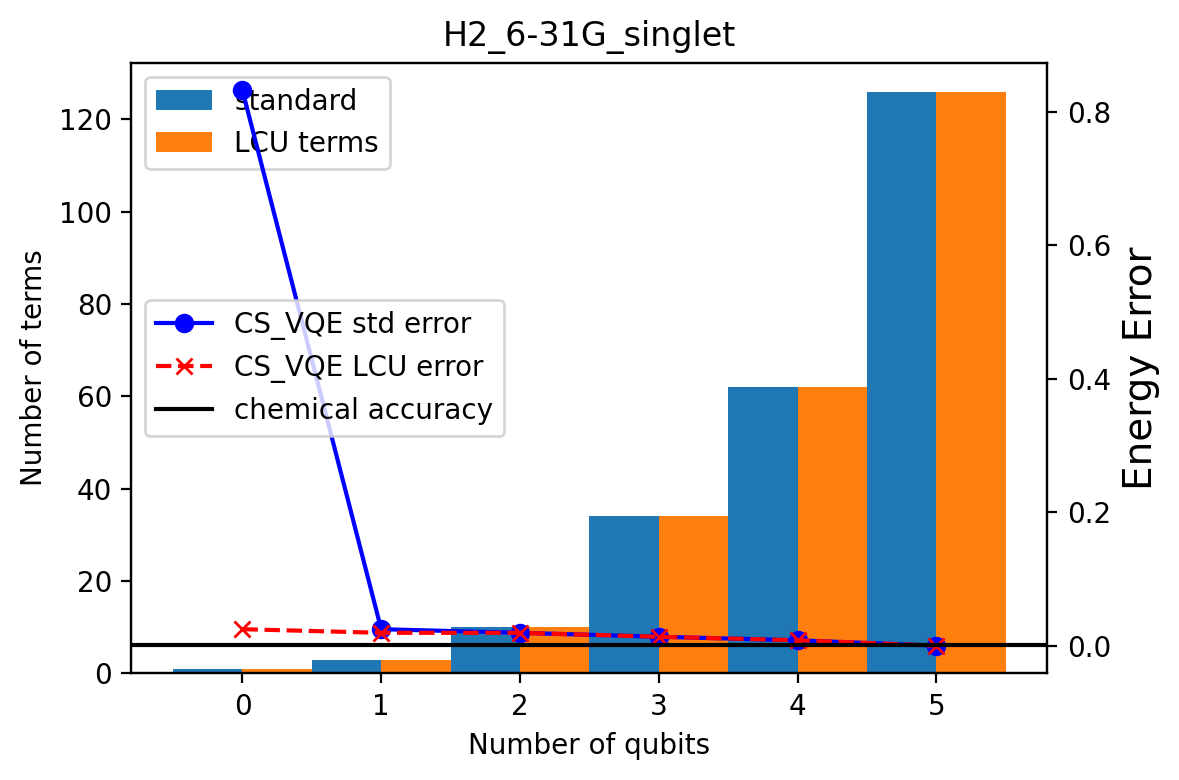

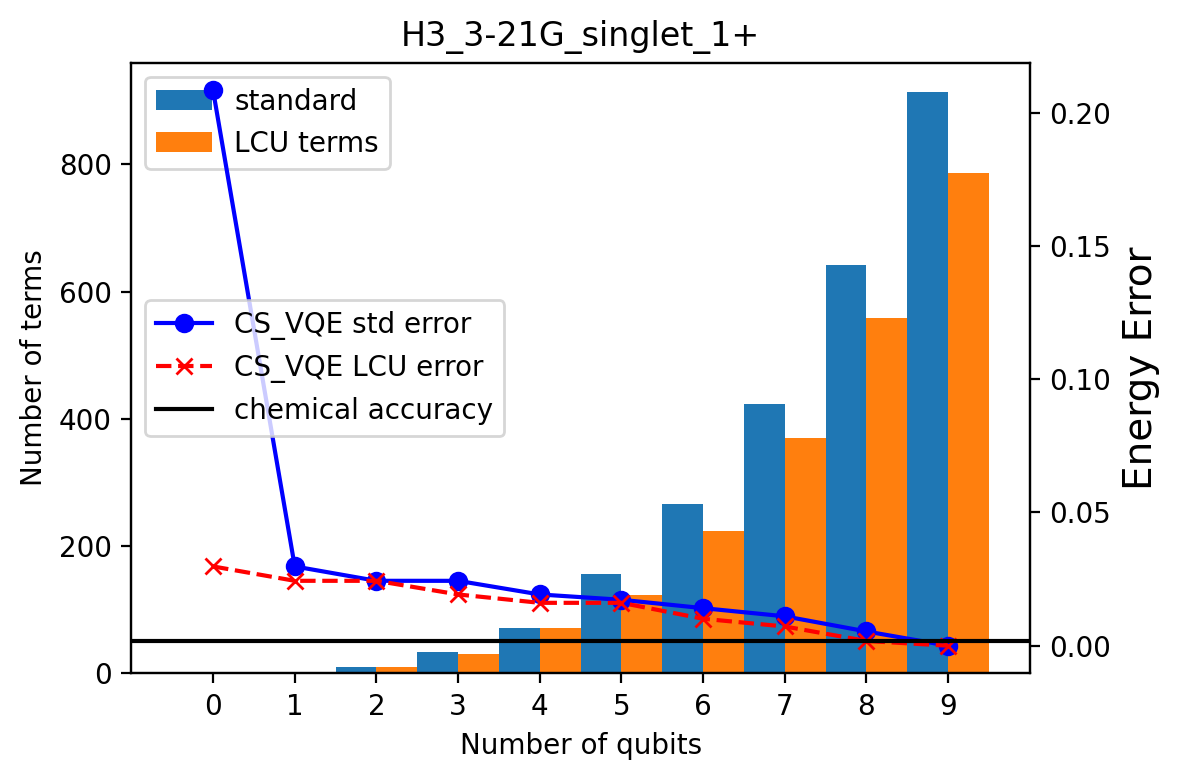

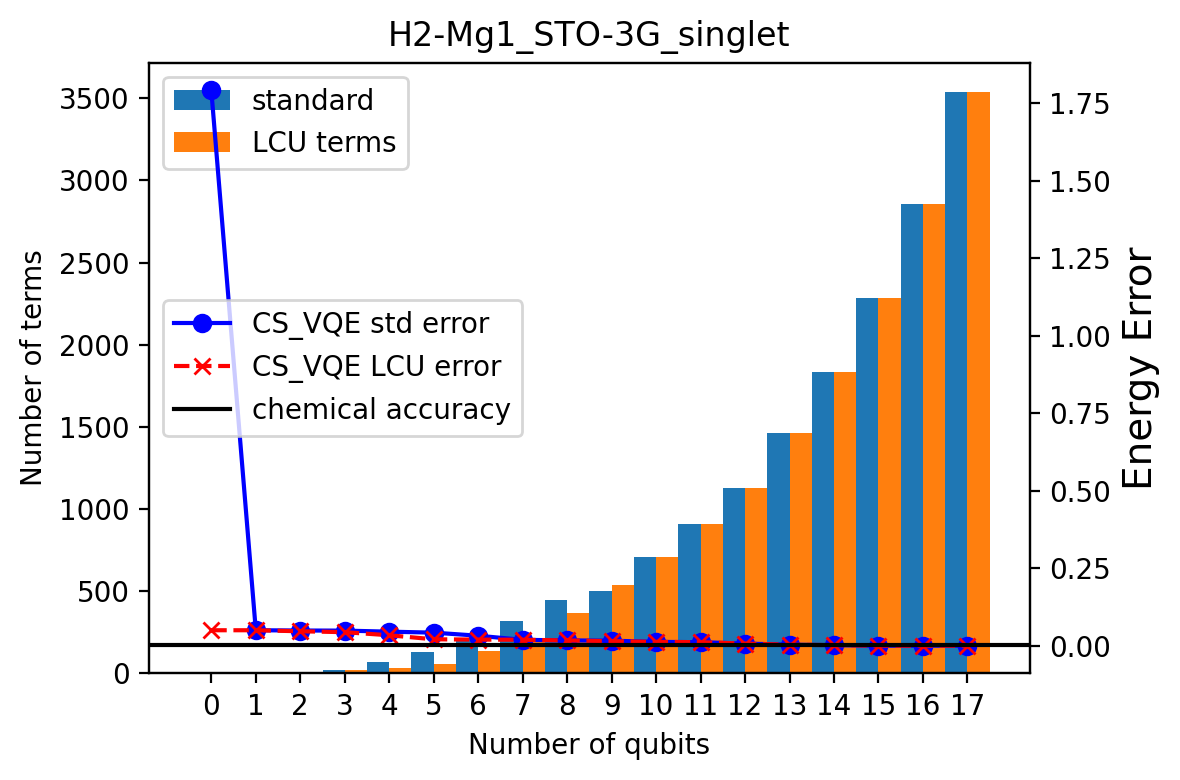

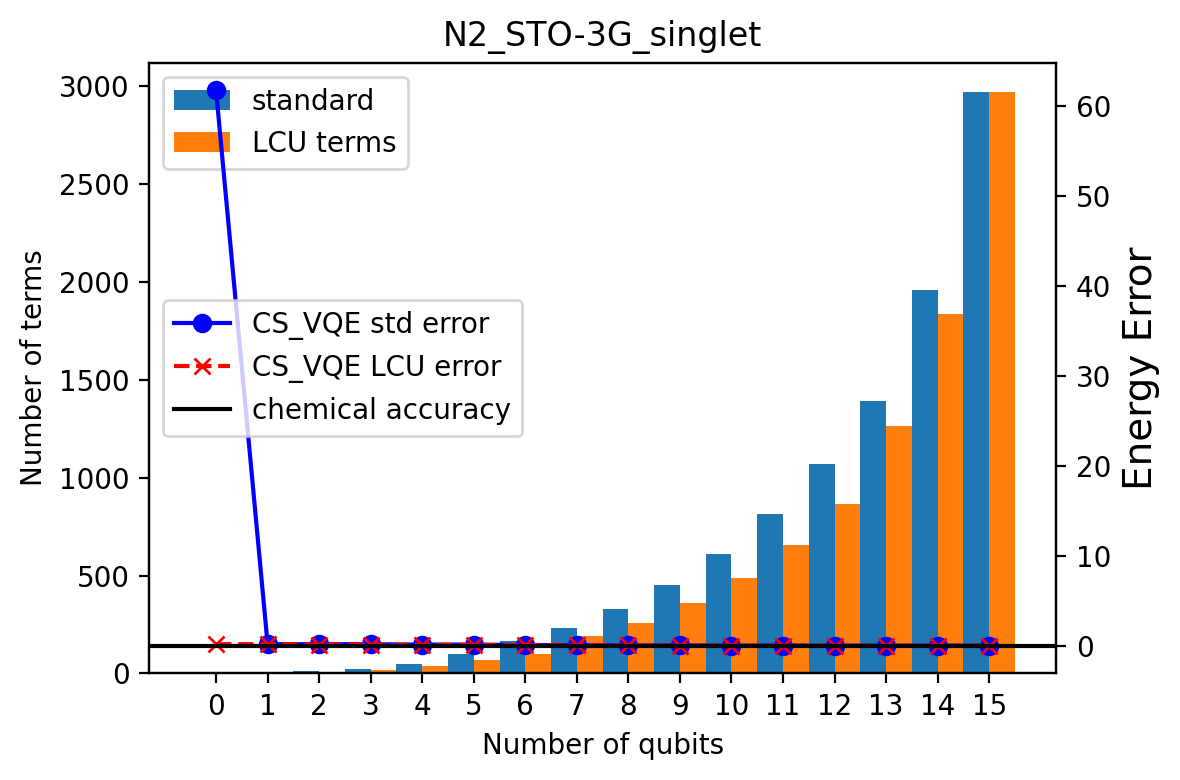

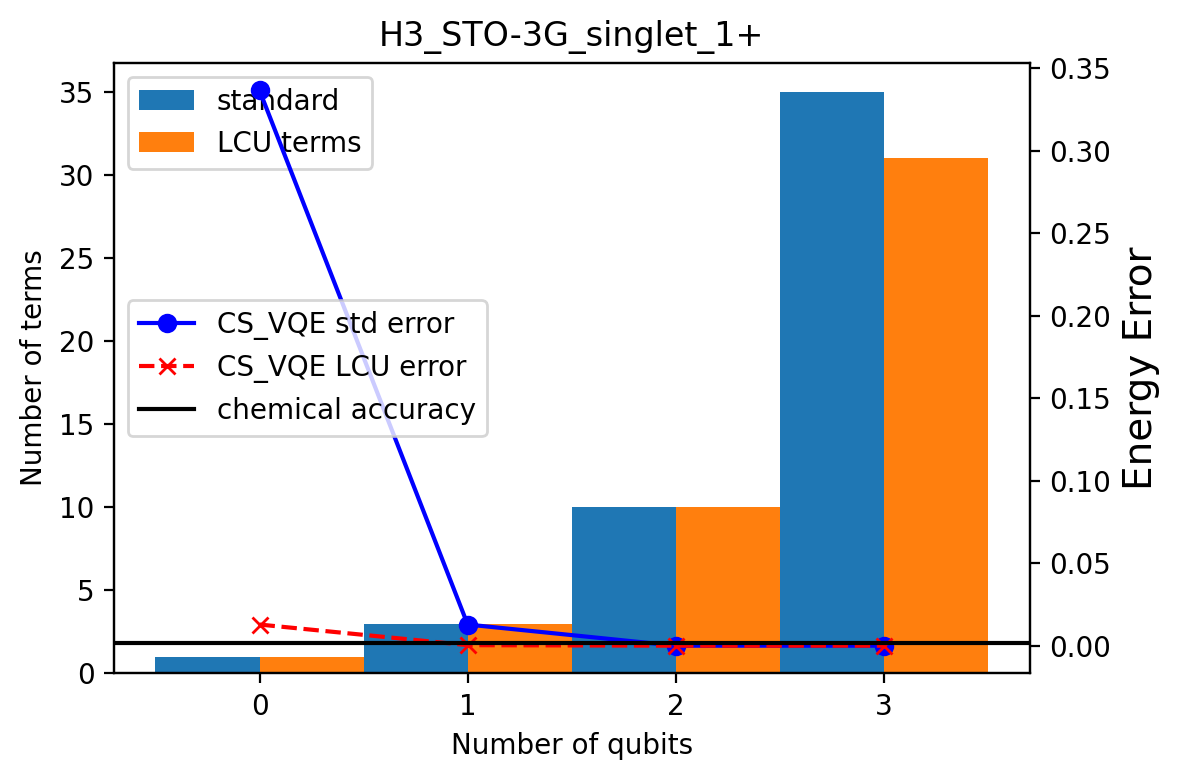

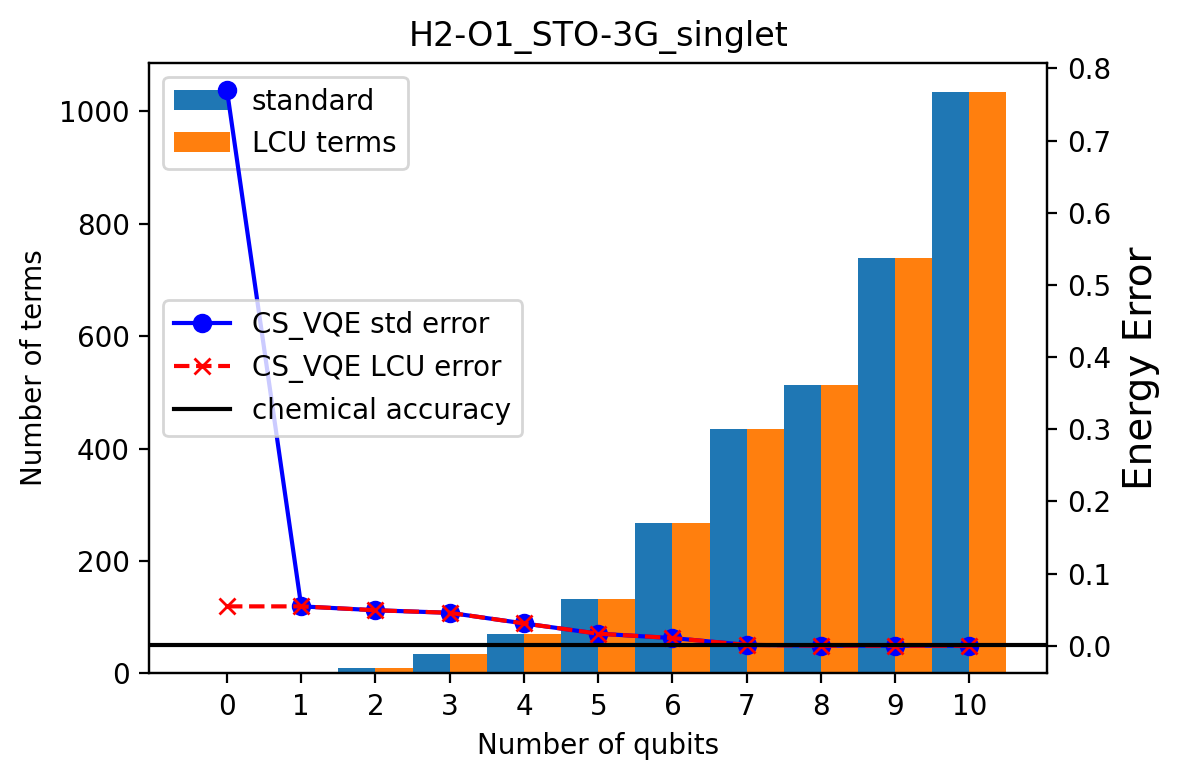

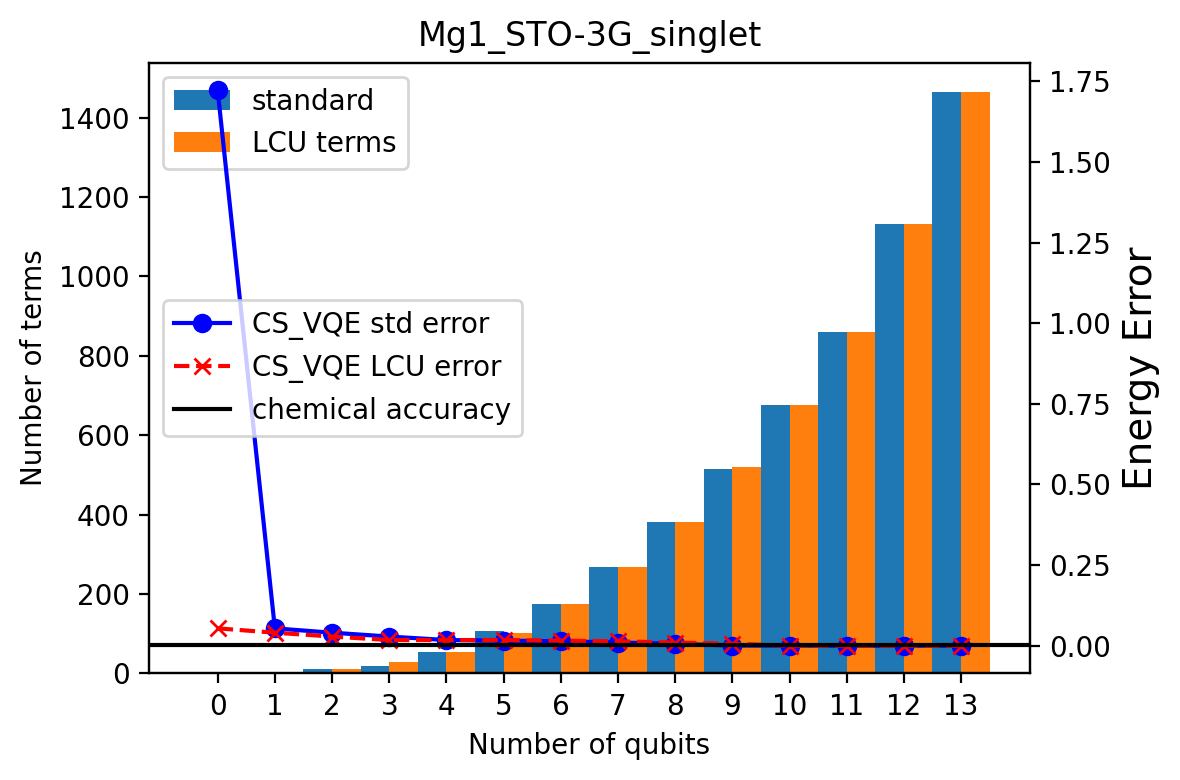

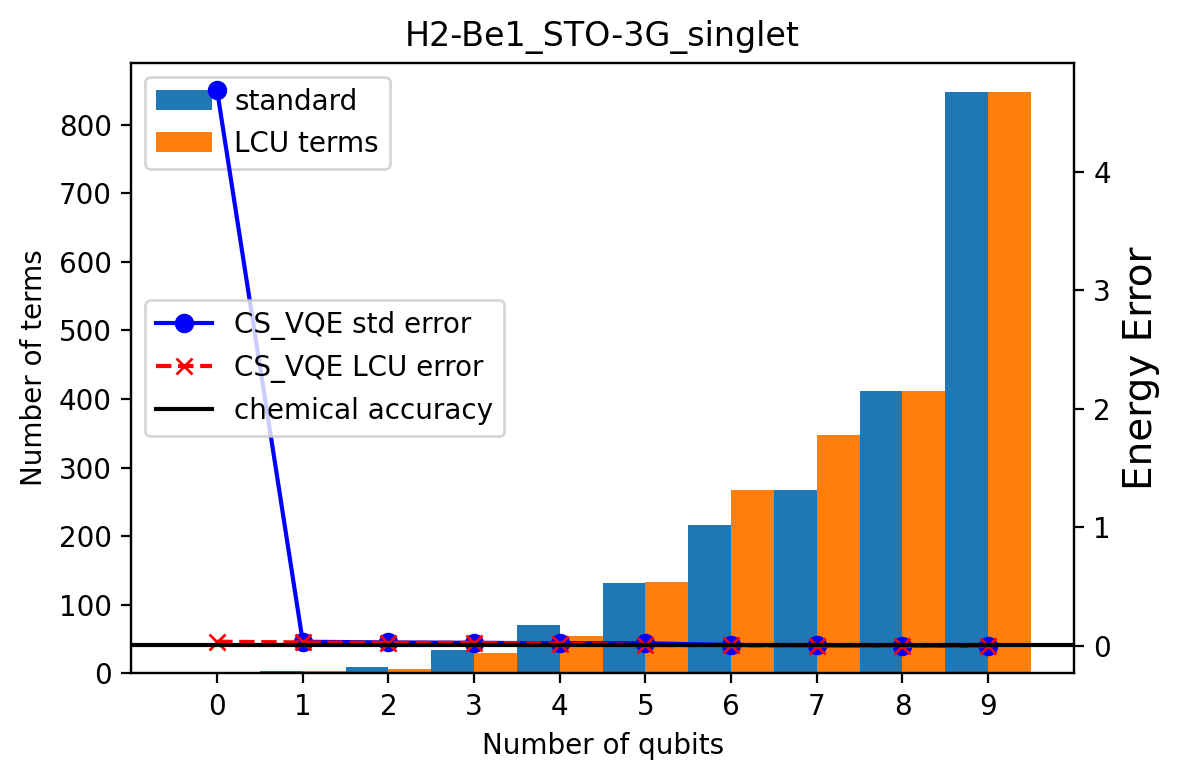

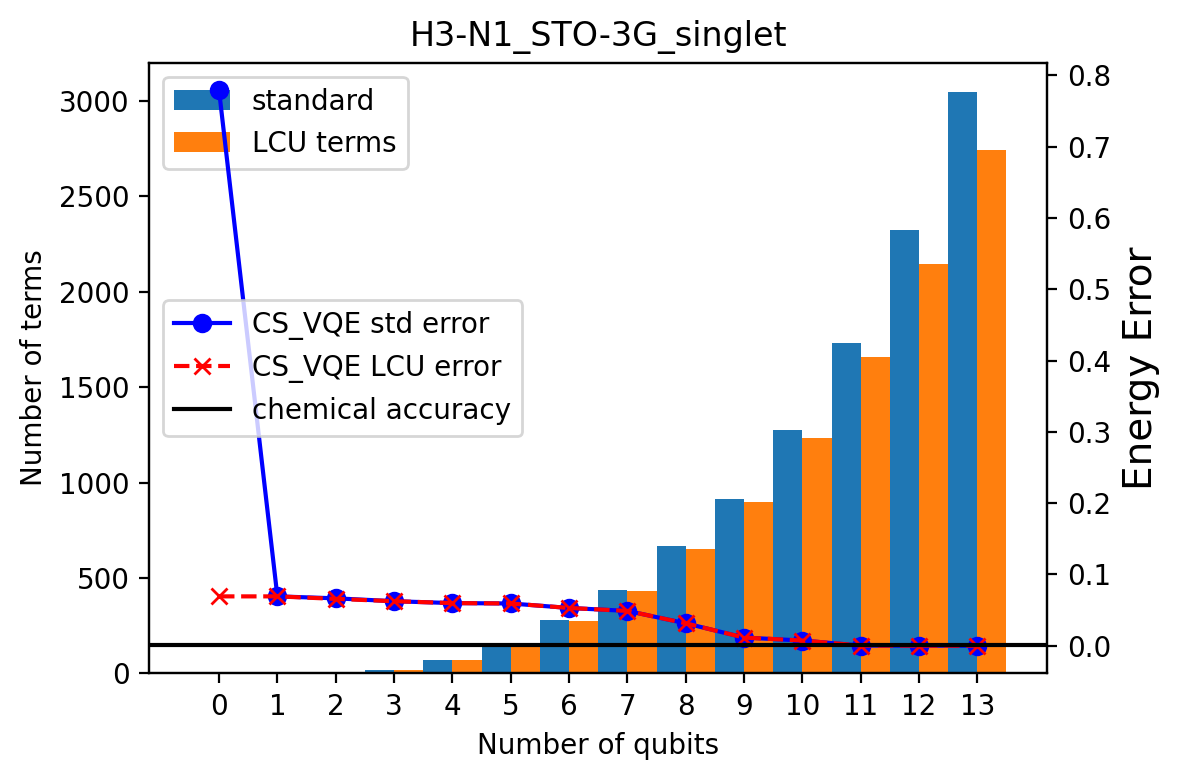

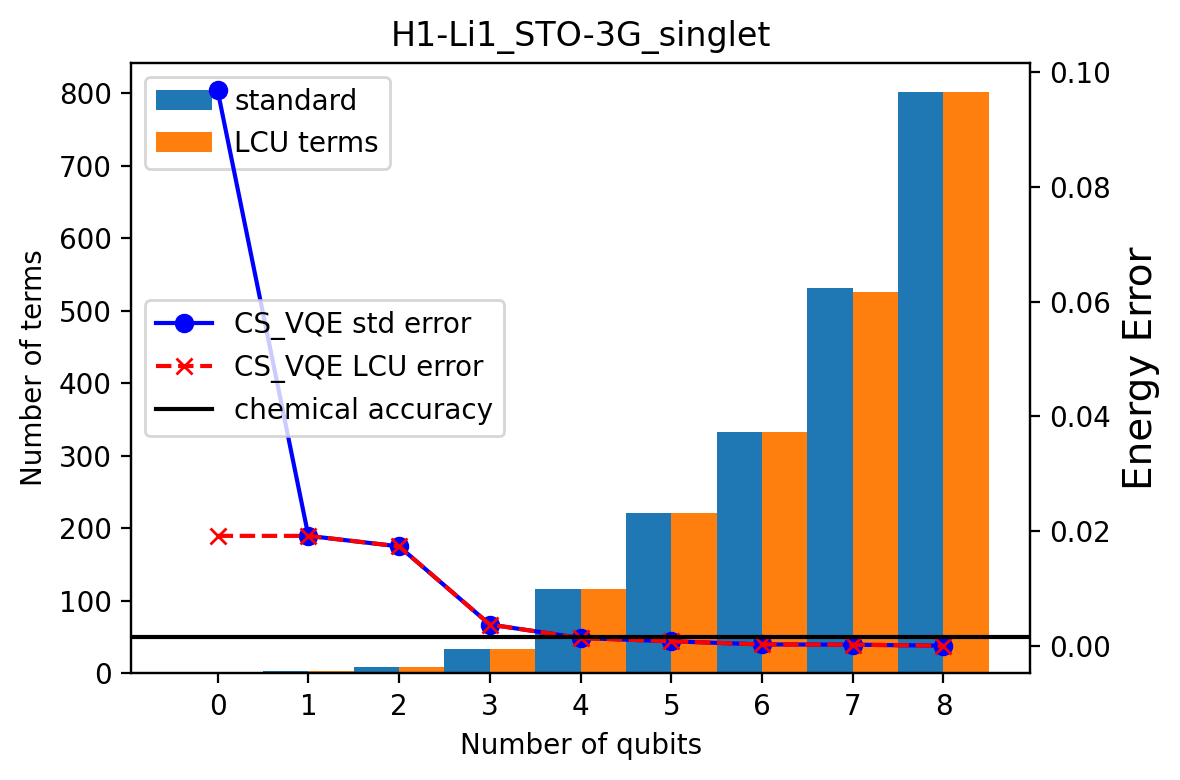

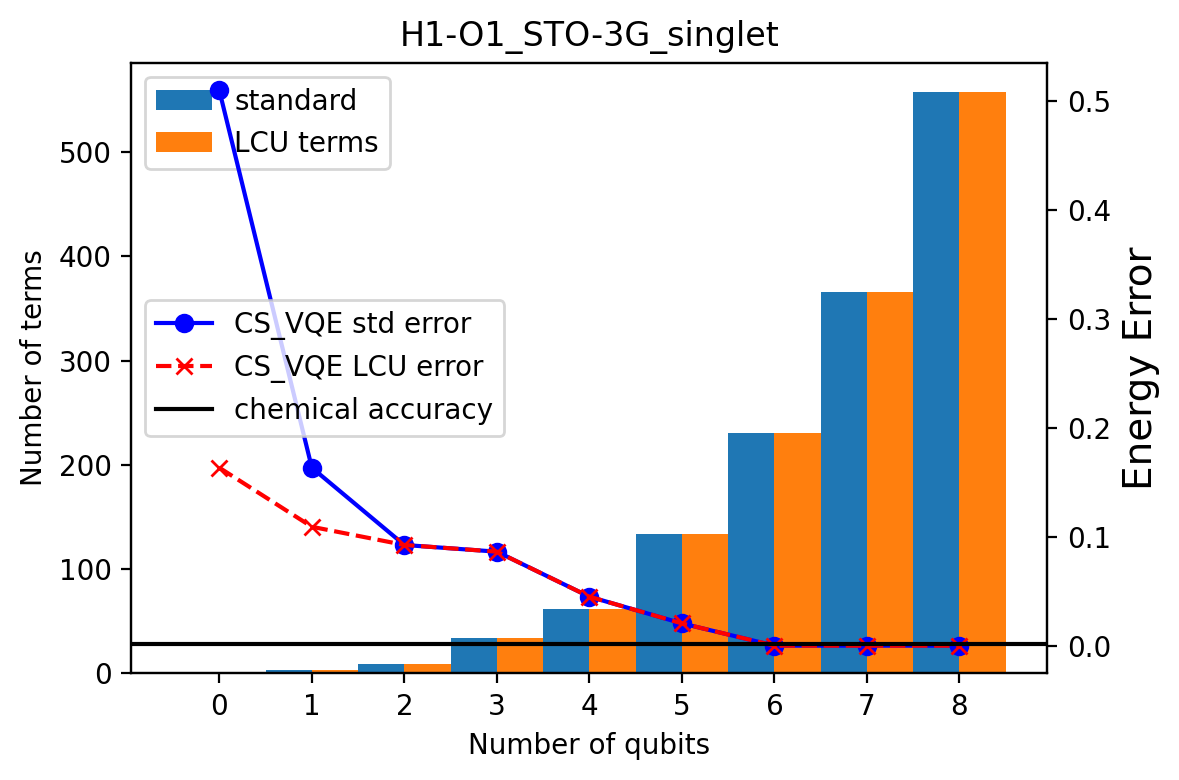

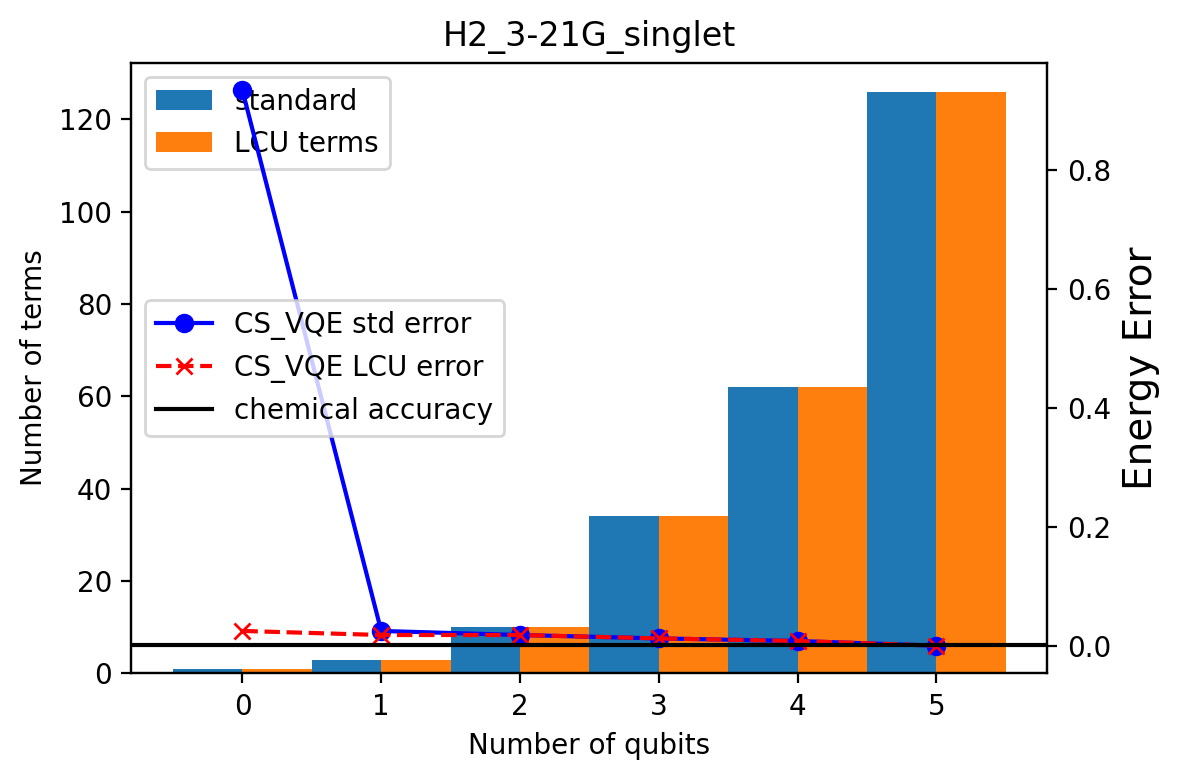

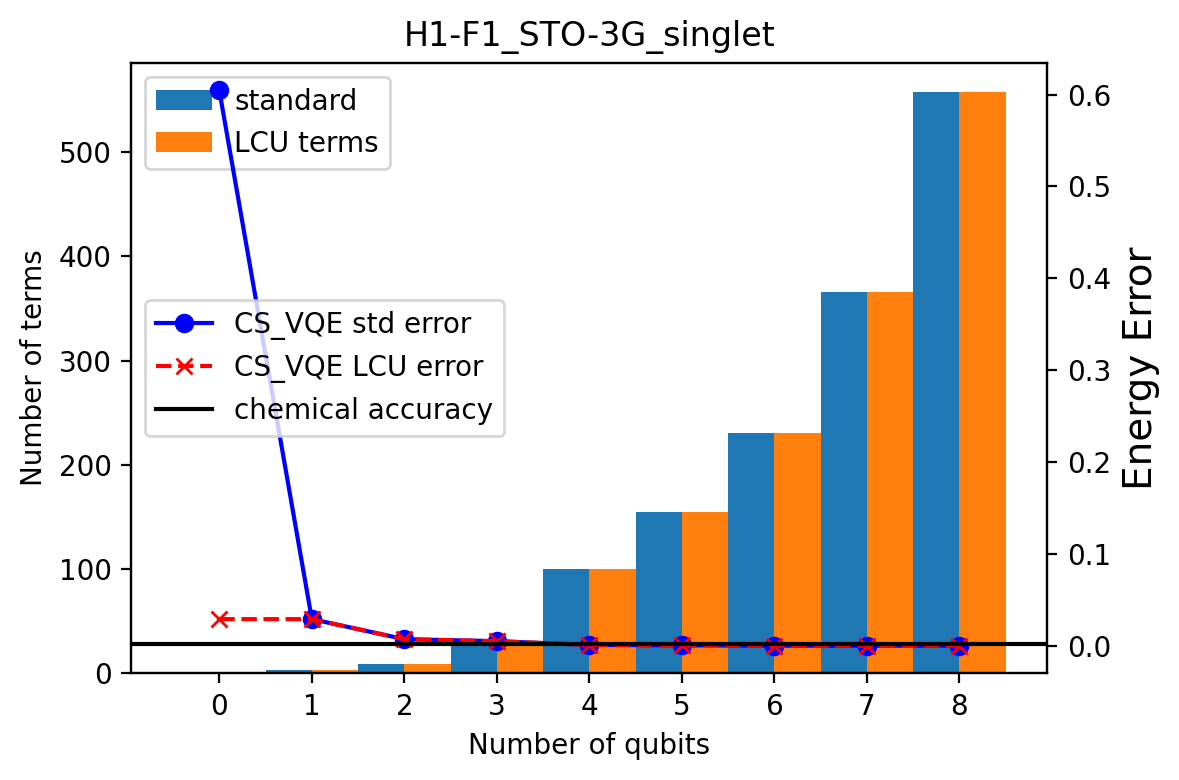

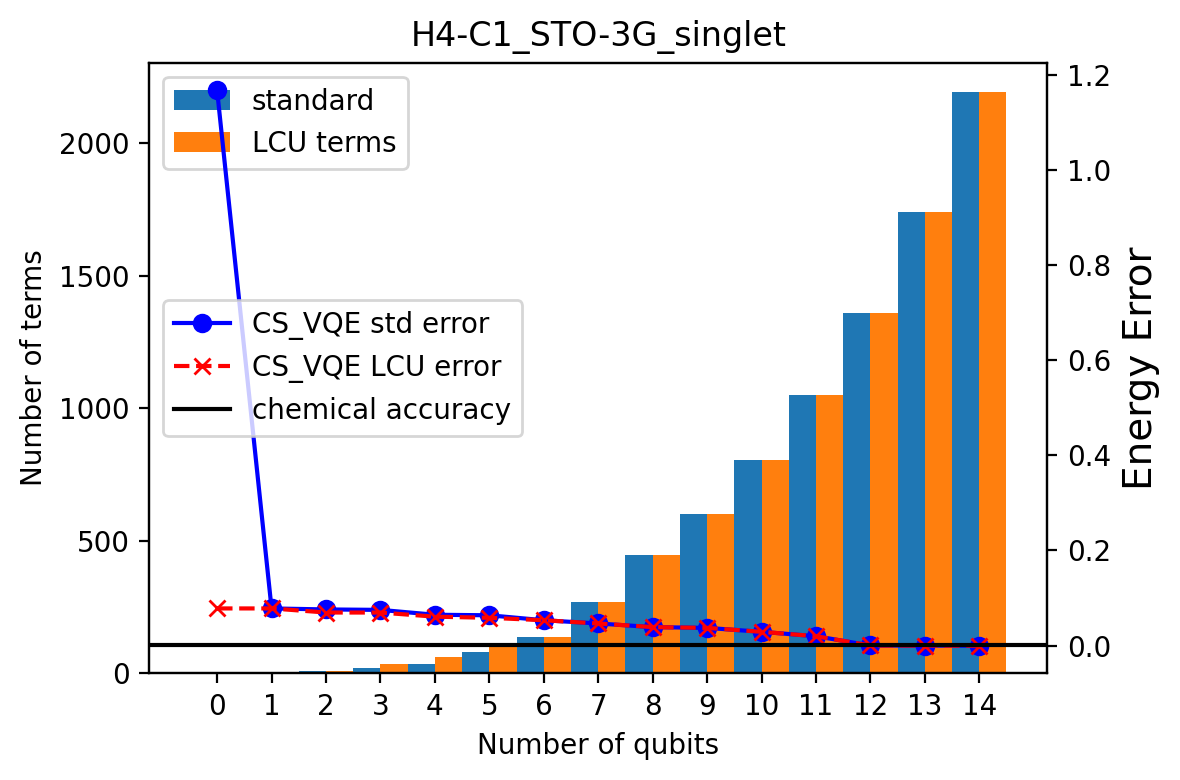

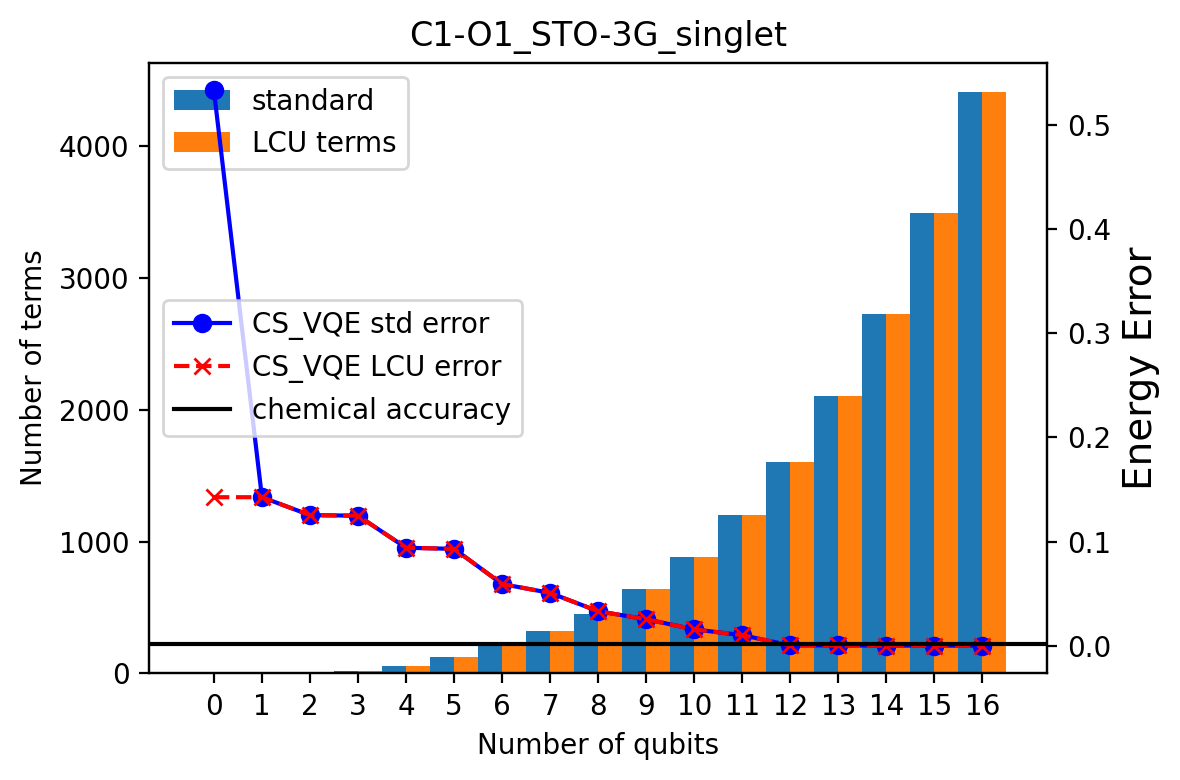

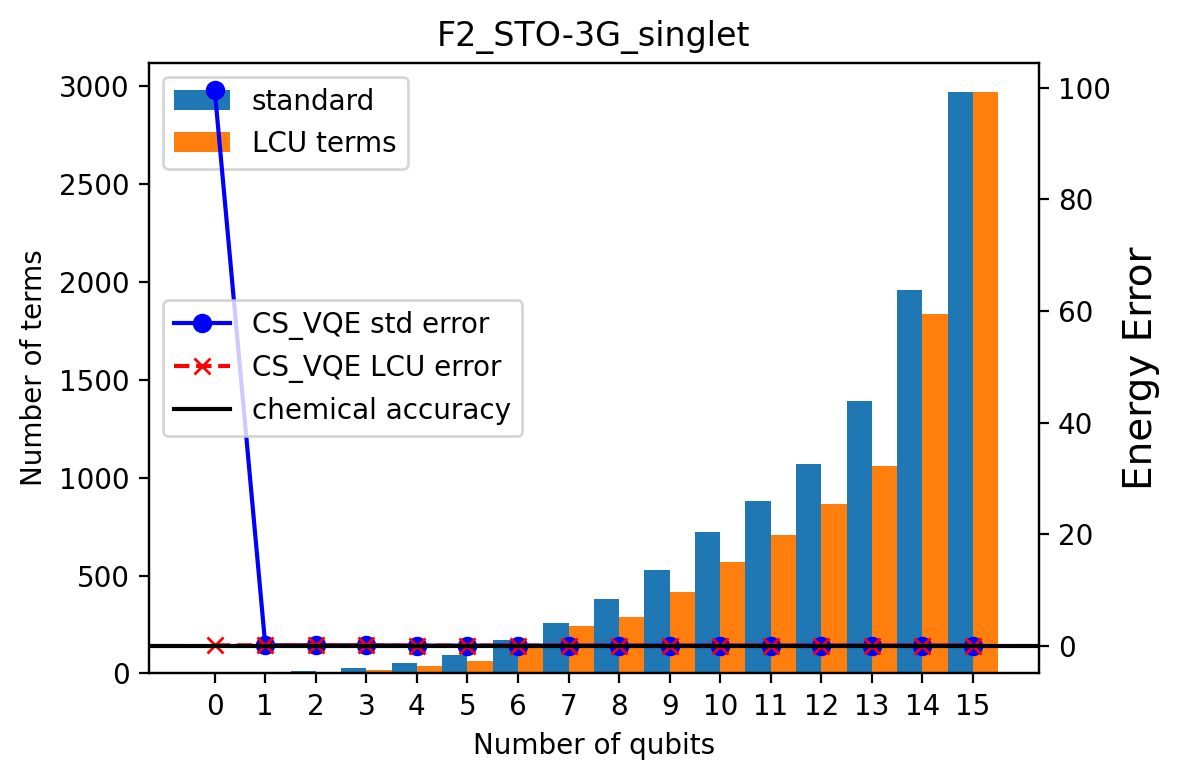

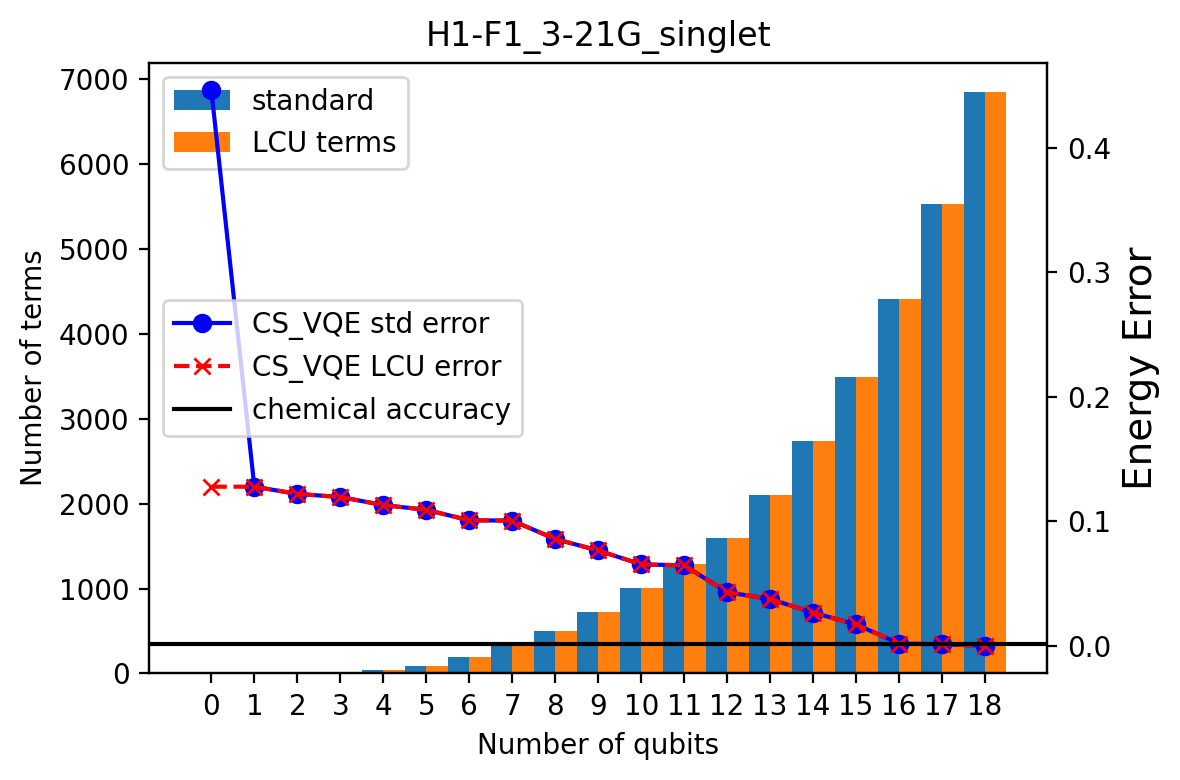

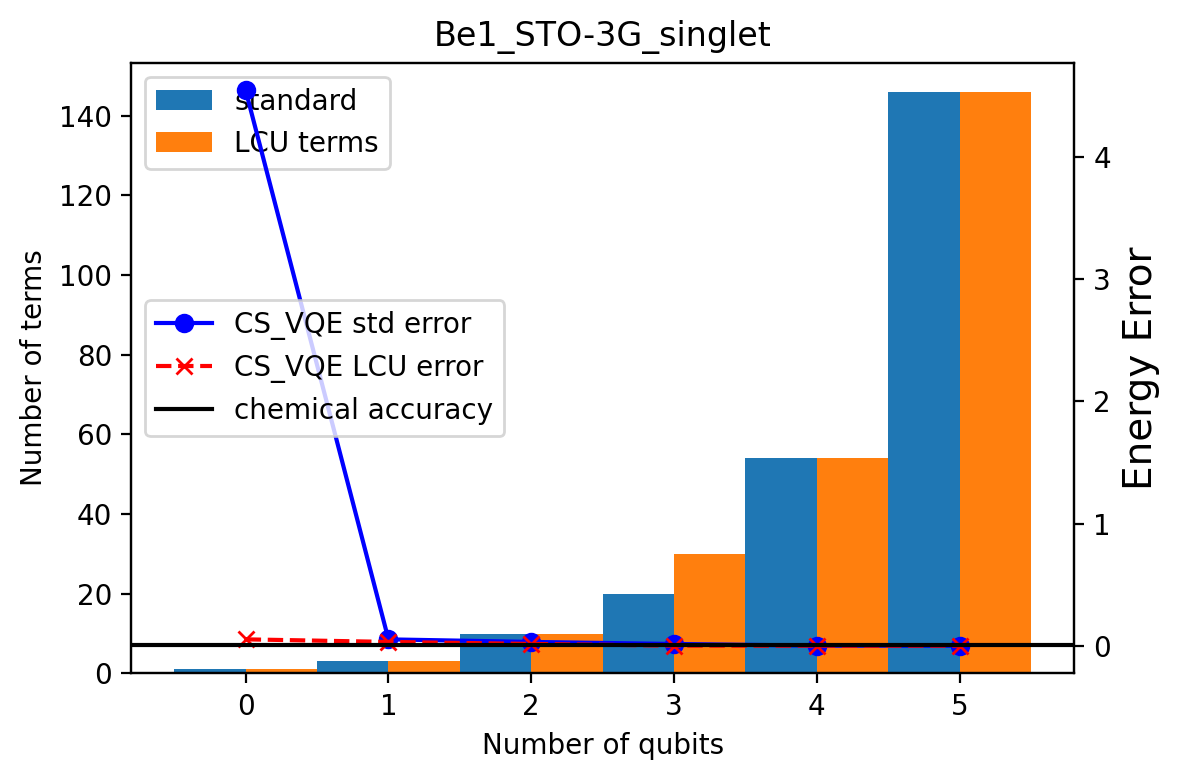

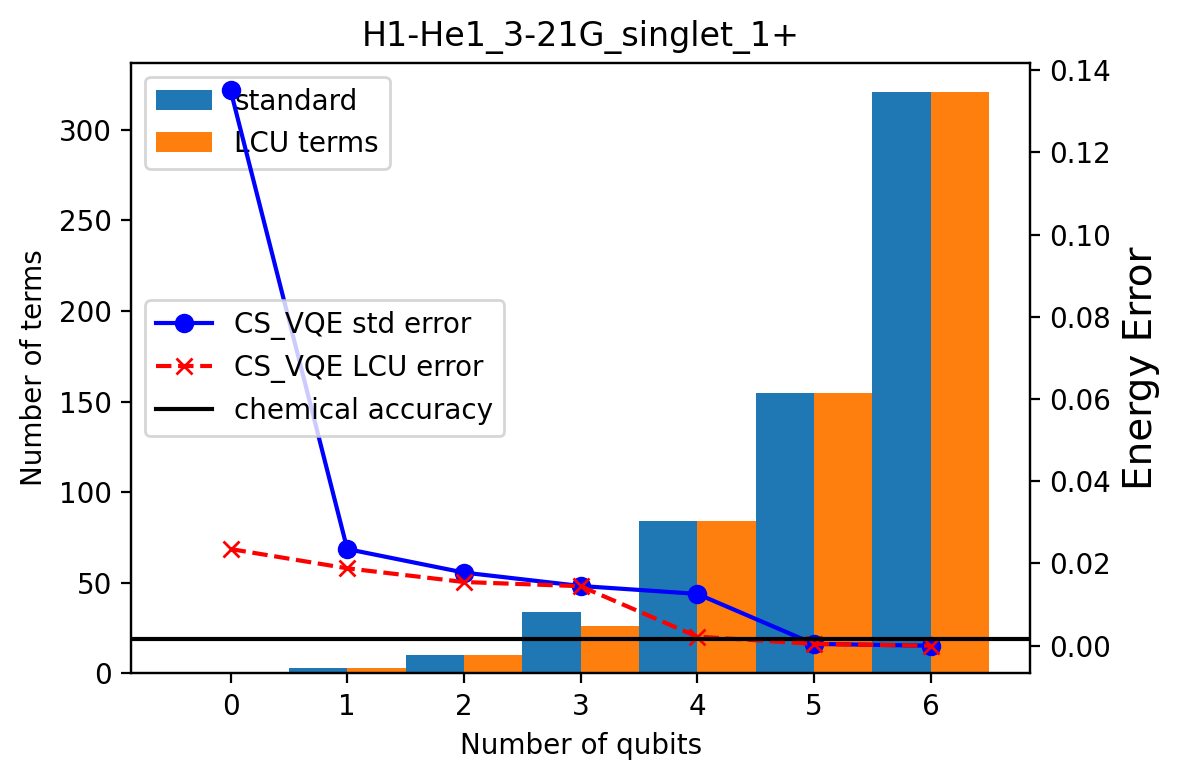

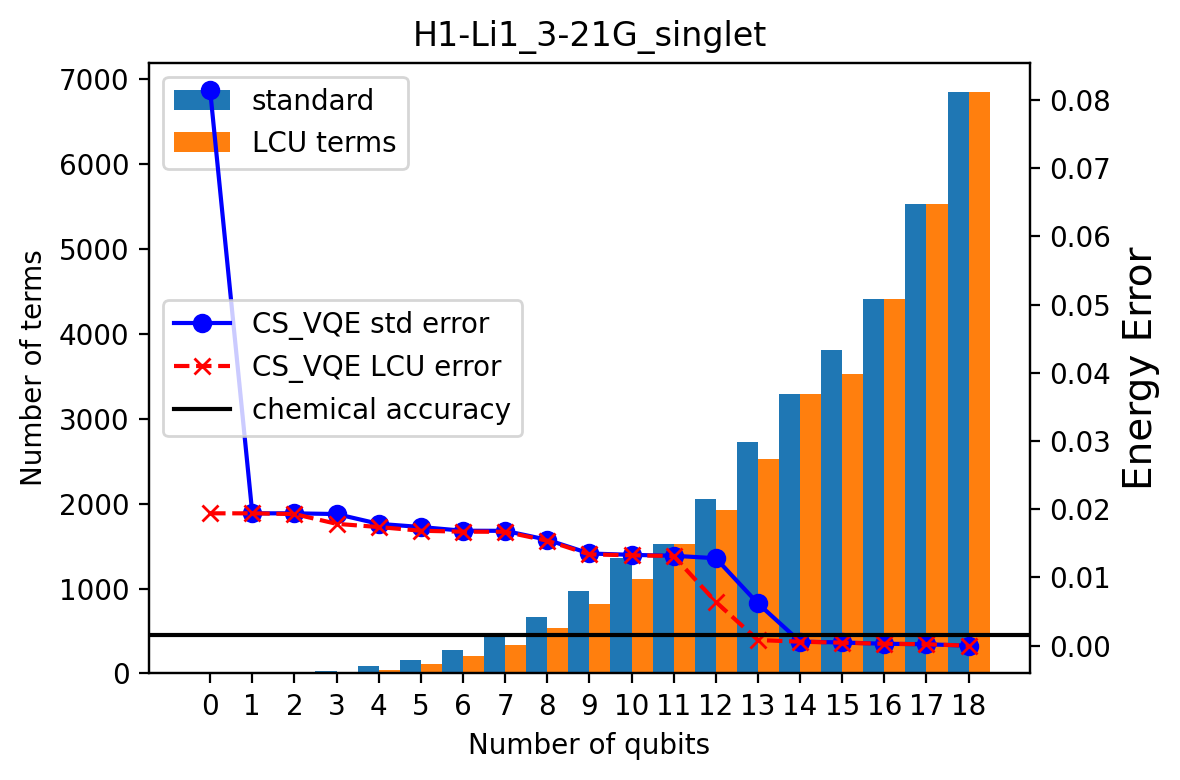

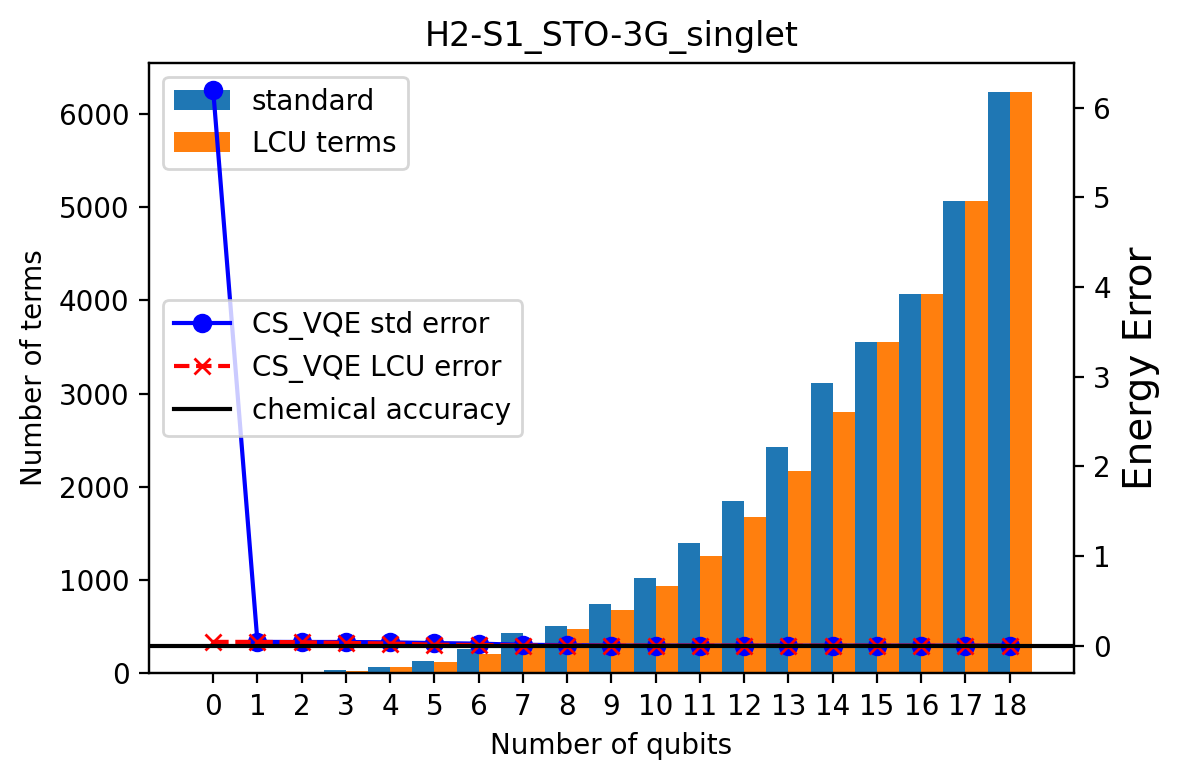

In [87]:
for key in myriad_LCU_results.keys():
#     if key=='Ar1_STO-3G_singlet':
#         continue
    if key in csvqe_results.keys():
        plot_n_qubits_VS_n_terms(LCU_RESULTS,STANDARD_RESULTS, key, dpi=200)

In [ ]:
print(len(STANDARD_RESULTS['N2_STO-3G_singlet']['qubit_removal_order']))
print(len(STANDARD_RESULTS['N2_STO-3G_singlet']['CS_VQE_error_results']))
print(len(STANDARD_RESULTS['N2_STO-3G_singlet']['Contextual_Hamiltonian_list']))

In [ ]:
STANDARD_RESULTS['N2_STO-3G_singlet']['Contextual_Hamiltonian_list']

In [ ]:
print(len(LCU_RESULTS['N2_STO-3G_singlet']['qubit_removal_order']))
print(len(LCU_RESULTS['N2_STO-3G_singlet']['CS_VQE_error_results']))
print(len(LCU_RESULTS['N2_STO-3G_singlet']['Contextual_Hamiltonian_list']))

[8, 9, 6, 7, 13, 10, 3, 2, 4, 0, 5, 1, 12, 11]
[13, 10, 9, 8, 7, 6, 3, 2, 4, 0, 5, 1, 12, 11]


In [79]:
key = 'H4-C1_STO-3G_singlet'
print(myriad_std_results[key][-1])
print(myriad_LCU_results[key][-1])

print()
print(len(LCU_RESULTS[key]['qubit_removal_order']))
print(len(LCU_RESULTS[key]['CS_VQE_error_results']))
print(len(LCU_RESULTS[key]['Contextual_Hamiltonian_list']))

[8, 9, 6, 7, 13, 10, 3, 2, 4, 0, 5, 1, 12, 11]
[13, 10, 9, 8, 7, 6, 3, 2, 4, 0, 5, 1, 12, 11]

14
15
15
